<h1 style="text-align: center;">Proyecto 2 - Neural Style Transfer</h1>

<h4 style="text-align: center;">

Roi Jared Flores Garza Stone

Esteban Gomez Valerio

Ivan Morales Camacho

Rafael Takata Garcia

Machine Learning - O2025_MAF3654H

Ing. Juan Antonio Vega Fernández, M. Sc., M. T. Ed

ITESO
</h4>

---

### **¿Qué es el Neural Style Transfer (NST)?**

El Neural Style Transfer (NST) es una técnica de Visión por Computadora que permite generar una nueva imagen combinando dos fotografías:

- Imagen de contenido: la fotografía que define qué se muestra (por ejemplo, un retrato de una persona o un paisaje).

- Imagen de estilo: la fotografía o pintura que define cómo se representa visualmente el contenido (por ejemplo, los trazos de Van Gogh o los colores de Monet).

El objetivo del NST es recrear el contenido de la primera imagen utilizando el estilo de la segunda, produciendo un resultado visualmente similar a una obra artística.

### **Origenes**

Esta técnica fue introducida por Gatys et al. (2015) en el artículo "A Neural Algorithm of Artistic Style" y utiliza redes neuronales convolucionales (CNNs) previamente entrenadas (por ejemplo, VGG-19) para extraer características de bajo y alto nivel de las imágenes.

### **¿Cómo funciona?**

- Las capas superficiales de la CNN capturan texturas, bordes y colores: ideales para el estilo.

- Las capas profundas capturan estructuras, formas y objetos: ideales para el contenido.

El NST funciona optimizando una imagen generada para minimizar una función de pérdida que combina:

- Pérdida de contenido – mide qué tan diferente es la nueva imagen del contenido original.

- Pérdida de estilo – mide qué tan diferente es la nueva imagen del estilo elegido.

- (Opcional) Pérdida de regularización – suaviza la imagen final para evitar ruido.

De esta manera, el NST no entrena desde cero una red neuronal; en su lugar, usa redes pre-entrenadas para extraer características y luego optimiza los píxeles de la imagen generada.

### **Proyecto**

En este notebook implementaremos el Neural Style Transfer usando dos frameworks: `PyTorch` y `Keras`. El manejo de dependencias se realizará a través de `uv`.

---

### Librerías a utilizar:

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import torch
import torchvision.transforms as transforms
from tensorflow import keras
from PIL import Image

Una vez que importamos las librerias, veamos las imagenes con las que trabajaremos:

In [59]:
#Definimos las rutas y los titulos para el momento de hacer el display de las gráficas
path_images_content = "../images/content"
path_images_style = "../images/style"

image_paths = [path_images_content, path_images_style]
titles = {
    path_images_content: "Imágenes de contenido:",
    path_images_style: "Imágenes de estilo:"
}


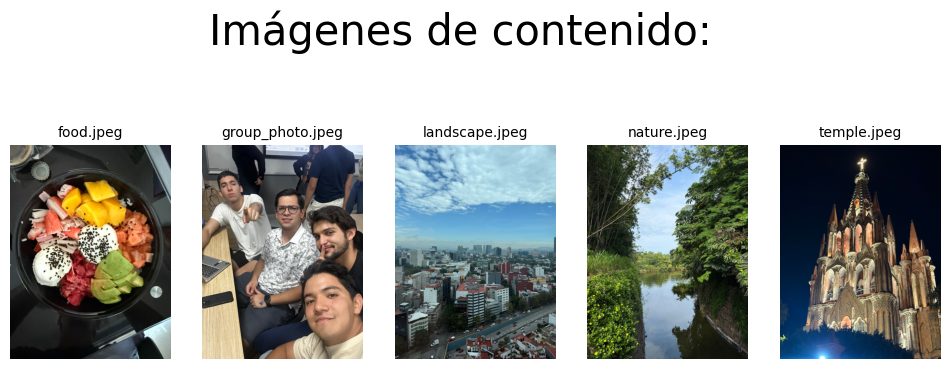

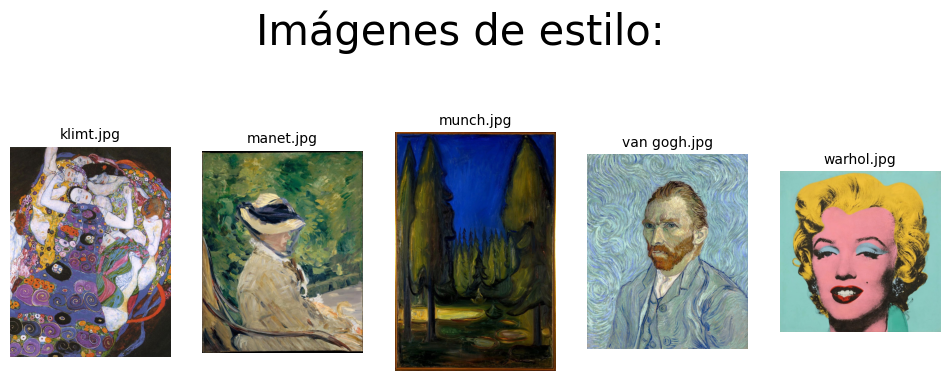

In [60]:
for path in image_paths:
    fig, axes = plt.subplots(1, 5, figsize=(12, 5))
    axes = axes.flatten()

    for i, img_name in enumerate(os.listdir(path)):
        img_path = os.path.join(path, img_name)
        img = mpimg.imread(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')          
        axes[i].set_title(img_name, fontsize=10)

    fig.suptitle(titles[path], fontsize=30)

### Image Preprocessing

Para poder aplicar las técnicas de Neural Style Transfer, necesitamos que las imagenes esten en forma de tensores de `Pytorch` y sean del mismo tamaño, crearemos una función capaz de hacerlo.

In [ ]:
def load_img(path_to_img):
    """
    Función que transforma una imagen a un tensor de PyTorch,
    limitada a un tamaño máximo de 512 en su lado más largo.
    """
    max_dim = 512
    img = Image.open(path_to_img).convert("RGB")
    
    size = max(img.size)
    scale = max_dim / size
    new_shape = (int(img.size[1] * scale), int(img.size[0] * scale))
    
    transform = transforms.Compose([
        transforms.Resize(new_shape),
        transforms.ToTensor()
    ])
    
    img = transform(img).unsqueeze(0)  # Añadir batch dimension [1, C, H, W]
    
    return img

Ahora utilizamos la función para hacer que todas nuestras imagenes de las carpetas `content` y `style` pasen a ser vectores de `Pytorch`:

In [62]:
content_images_pt = []
for image_name in os.listdir(path_images_content):
    img_path = os.path.join(path_images_content, image_name)
    content_images_pt.append(load_img(img_path))

style_images_pt = []
for image_name in os.listdir(path_images_style):
    img_path = os.path.join(path_images_style, image_name)
    style_images_pt.append(load_img(img_path))

In [65]:
len(content_images_pt), len(style_images_pt)

(5, 5)

In [66]:
content_images_pt[0].shape

torch.Size([1, 3, 512, 384])

Ya tenemos nuestras imagenes en formato de tensores de `Pytorch`